## ex1

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
# XOR dataset and targets
X = np.array([[0, 0], [1, 1], [1, 0], [0, 1]])
y = np.array([0, 0, 1, 1])

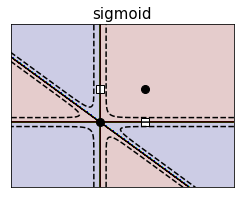

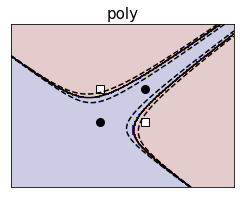

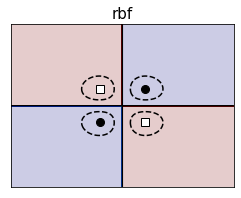

In [13]:
# fit the model
fignum = 0 
for kernel in ('sigmoid', 'poly', 'rbf'):
    clf = svm.SVC(kernel=kernel, gamma=4, coef0 = 0)
    clf.fit(X, y)
    
    # plot the line, the points, and the nearest vectors to the plane
    # fig, ax = plt.subplots()
    plt.figure(fignum, figsize=(4, 3))
    plt.clf()

    plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=80,
                facecolors='None')
    plt.plot(X[:2, 0], X[:2, 1], 'ko', markersize = 8)
    plt.plot(X[2:, 0], X[2:, 1], 'ws', mec ='k', markersize = 8)

    plt.axis('tight')
    x_min = -2
    x_max = 3
    y_min = -2
    y_max = 3

    XX, YY = np.mgrid[x_min:x_max:200j, y_min:y_max:200j]
    Z = clf.decision_function(np.c_[XX.ravel(), YY.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(XX.shape)
    plt.figure(fignum, figsize=(4, 3))
    CS = plt.contourf(XX, YY, np.sign(Z), 200, cmap='jet', alpha = .2)
    plt.contour(XX, YY, Z, colors=['k', 'k', 'k'], linestyles=['--', '-', '--'],
                levels=[-.5, 0, .5])
    plt.title(kernel, fontsize = 15)
    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)

    plt.xticks(())
    plt.yticks(())
    fignum += 1
plt.show()


## ex2

In [14]:
# XOR dataset and targets
X = np.c_[(-1, -3),
          (0, -2),
          (1, -2),
          (2, 1),
          (3, 0),
          (1.5, 1.4),
          # ---
          (1, 3),
          (0.5, -1),
          (-1, 2),
          (-2, -1.5),
          (-2, 0),
          (-1.5, -1.2)].T
N = 6
Y = [0] * N + [1] * N

# means = [[2, 2], [4, 2]]
# cov = [[.7, 0], [0, .7]]
# N = 20
# X0 = np.random.multivariate_normal(means[0], cov, N) # each row is a data point
# X1 = np.random.multivariate_normal(means[1], cov, N)

# X = np.vstack((X0, X1))
# Y = [0]*N + [1]*N

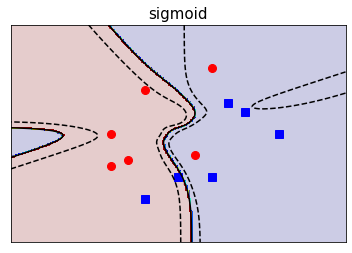

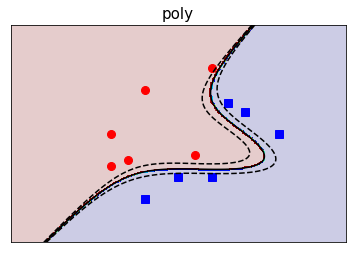

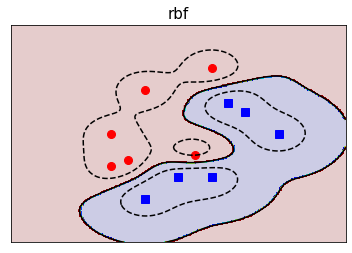

In [15]:
# figure numb
fignum = 1

# fit the model
for kernel in ('sigmoid', 'poly', 'rbf'):
    clf = svm.SVC(kernel=kernel, gamma=1, coef0 = 1)
    clf.fit(X, Y)
    
    # plot the line, the points, and the nearest vectors to the plane
    fig, ax = plt.subplots()
    plt.figure(fignum, figsize=(4, 3))
    plt.clf()

    plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=80,
                facecolors='None')
    plt.plot(X[:N, 0], X[:N, 1], 'bs', markersize = 8)
    plt.plot(X[N:, 0], X[N:, 1], 'ro', markersize = 8)

    plt.axis('tight')
    x_min = -5
    x_max = 5
    y_min = -5
    y_max = 5

    XX, YY = np.mgrid[x_min:x_max:200j, y_min:y_max:200j]
    Z = clf.decision_function(np.c_[XX.ravel(), YY.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(XX.shape)
    plt.figure(fignum, figsize=(4, 3))
    CS = plt.contourf(XX, YY, np.sign(Z), 200, cmap='jet', alpha = .2)
    plt.contour(XX, YY, Z, colors=['k', 'k', 'k'], linestyles=['--', '-', '--'],
                levels=[-.5, 0, .5])
    plt.title(kernel, fontsize = 15)
    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)

    plt.xticks(())
    plt.yticks(())
    fignum = fignum + 1
plt.show()

## MNIST

In [16]:
import numpy as np 
from sklearn import svm
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [63]:
data_dir = 'E:\AIWorkplace\MLCB\kernelsvm' # path to your data folder 
mnist = fetch_openml('mnist_784', data_home=data_dir)

In [73]:
X_all = mnist.data.to_numpy() # data normalization 
X_all /= 255
y_all = mnist.target.to_numpy()

digits = ['0', '1', '2', '3']
ids = []
for d in digits:
    ids.append(np.where(y_all == d)[0])

selected_ids = np.concatenate(ids, axis = 0)
X = X_all[selected_ids]
y = y_all[selected_ids]
print('Number of samples = ', X.shape[0])

Number of samples =  28911


In [74]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 10000)

model = svm.SVC(kernel='rbf', gamma=.1, coef0 = 0)
model.fit(X_train, y_train)

y_pred = model.predict(X_test) 
print("Accuracy: %.2f %%" %(100*accuracy_score(y_test, y_pred))) 

Accuracy: 96.73 %
